**Prince Amankwah**

**For this part of the project we will be inspecting a Kaggle Titanic Dataset.**

**For a direct link to the dataset: https://www.kaggle.com/c/titanic/data**
**Download the training data from https://www.kaggle.com/c/titanic/data as a CSV file.**

**I decided to analyze a Titanic dataset since its gives us the ability to apply machine learning tools to analyze the passenger information from the training set, and analyze what factors may affect a passenger's chance for survival.**

# Stage I: Data Exploration

Load the training dataset as a Pandas DataFrame. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
titanic_train = pd.read_csv("train.csv")
titanic_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
#This dataset contains a total of 891 rows and 12 columns
titanic_train.shape

(891, 12)

In [4]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#Stats on numerical columns
titanic_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

**We notice that the "Age" column contains missing values**

In [6]:
#Stats on categorical columns
titanic_train.describe(include = ["O"])

Name   Sex    Ticket        Cabin Embarked
count                  891   891       891          204      889
unique                 891     2       681          147        3
top     Mallet, Mr. Albert  male  CA. 2343  C23 C25 C27        S
freq                     1   577         7            4      644

**We notice that the "Cabin" column contains missing values**

In [7]:
#Number of passengers that survived(1) vs passengers that did not survive(0)
titanic_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0, 0.5, 'Count')

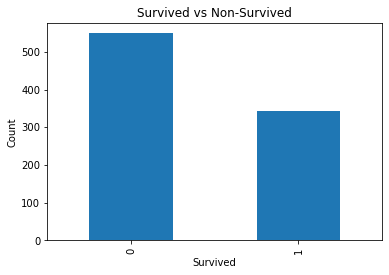

In [8]:
#Bar plot visualization comparing passengers who survived and did not survive
titanic_train["Survived"].value_counts().plot(kind='bar')
plt.title('Survived vs Non-Survived')
plt.xlabel("Survived")
plt.ylabel("Count")

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/App

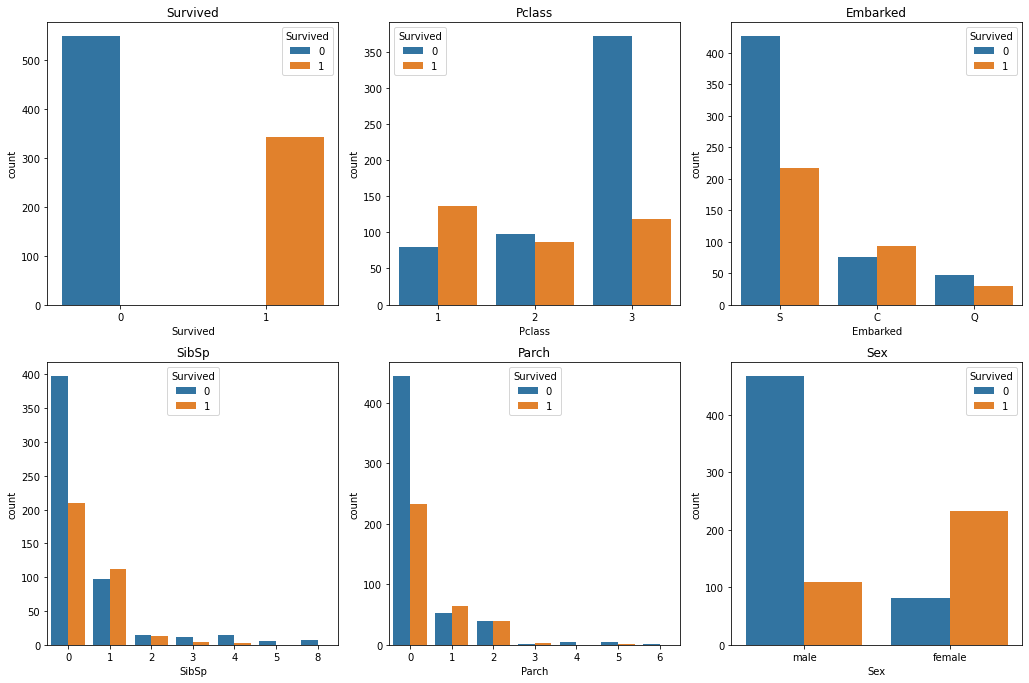

In [9]:
#Create a figure and a set of subplots to show the counts for our columns 
cols = ["Survived", "Pclass", "Embarked", "SibSp", "Parch", "Sex"]

num_rows = 2
num_columns = 3

fig, axs = plt.subplots(num_rows, num_columns, figsize = (num_rows * 7.2, num_columns * 3.2))

for r in range(0, num_rows):
    for c in range(0, num_columns):
        
        i = r * num_columns + c
        ax = axs[r][c]
        sns.countplot(titanic_train[cols[i]], hue=titanic_train["Survived"], ax = ax)
        ax.set_title(cols[i])
                      
plt.tight_layout() 
                                      

**In the data column names, "Survived" refers to passengers who survived(1) and passegers who did not survive(0). The "Pclass" column refers to the type of class the passenger onboarded titanic with, which is indicated by first class(1), second class(2), and third class(3). Our "Fare" refers to the price the passenger paid for the ticket. "SibSp" refers to the amount of siblings/spouse the passengers has. Our "Embarked" refers to the location the passenger embarked from.**

**Our "Pclass" visualization shows that males who were in 3rd class had the least likely hood of surviving**.
**Our "Embarked" visualization shows that males who embarked from S had the least likely hood of surviving**. 
**Our "SibSp" visualization shows that about 400 passengers who did not onboard with a sibling or spouse did not survive**

In [10]:
#Groupby shows that out of all the females 74% survived and out of all the men 18% survived. 
titanic_train.groupby("Sex")[["Survived"]].mean()

Survived
Sex             
female  0.742038
male    0.188908

In [11]:
#Groupby shows that out of all the Embarked locations, those coming from S had the least likely hood of survival at 33%
#Those traveling from C had a greater chance of survival at 55%
titanic_train.groupby("Embarked")[["Survived"]].mean()

Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957

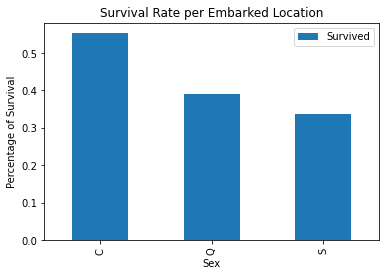

In [12]:
#Visualization of survived passengers from each Embarked location
titanic_train.groupby("Embarked")[["Survived"]].mean().plot(kind='bar')
plt.title("Survival Rate per Embarked Location")
plt.xlabel("Sex")
plt.ylabel("Percentage of Survival")
plt.show()

In [13]:
#Our pivot table shows the survival rate comparing the Sex and Embarked locations. Women traveling from C had the 
#greatest chance of survival at 87% followed by 75% from location Q and 68% from location S.
#Men had the greatest chance of survival from location C at 30%, followed by 7% at location Q, and 17% from 
#location S.
titanic_train.pivot_table("Survived", index = "Sex", columns = "Embarked")

Embarked         C         Q         S
Sex                                   
female    0.876712  0.750000  0.689655
male      0.305263  0.073171  0.174603

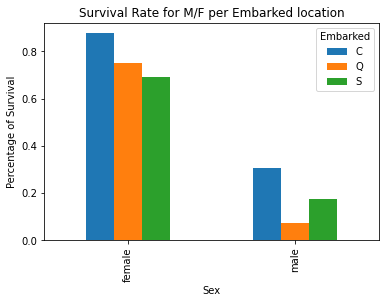

In [14]:
#Visualization of survival rate for male/female from each Embarked location 
titanic_train.pivot_table("Survived", index = "Sex", columns = "Embarked").plot(kind="bar")
plt.title("Survival Rate for M/F per Embarked location")
plt.xlabel("Sex")
plt.ylabel("Percentage of Survival")
plt.show()

In [15]:
#Our pivot table shows the survival rate comparing the Sex and Pclass. Women from 1st class had the 
#greatest chance of survival at 96% followed by 92% from 2nd class and 50% from 3rd class.
#Men had the greatest chance of survival from 1st class at 36%, followed by 15% from 2nd class, and 13% from 
#3rd class.
titanic_train.pivot_table("Survived", index = "Sex", columns = "Pclass")

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

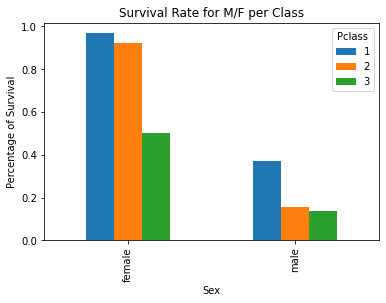

In [16]:
#Visualization of survival rate for male/female from each class
titanic_train.pivot_table("Survived", index = "Sex", columns = "Pclass").plot(kind="bar")
plt.title("Survival Rate for M/F per Class")
plt.xlabel("Sex")
plt.ylabel("Percentage of Survival")
plt.show()

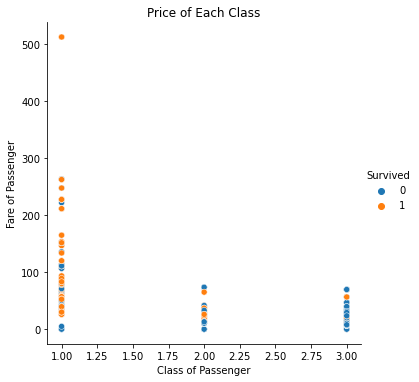

In [17]:
#Scatter plot Visualization of survival for each passenger and their associated class class compared w/ Fare price
#We notice that 1st class passengers contained the most expensive fair price, just over $500
#We also notice that majority of the deaths came from 3rd class passengers indicated by blue circle.
sns.relplot(x ="Pclass", y = "Fare", hue = "Survived", data = titanic_train)
plt.title("Price of Each Class")
plt.xlabel("Class of Passenger")
plt.ylabel("Fare of Passenger")
plt.show()

(3) Data Cleaning

1. Remove all columns with excesive missing values.
2. After Step 1, remove any row that has missing values.

In [18]:
#As we can see we have 3 columns with missing values
titanic_train.isna().values.any(axis=0)

array([False, False, False, False, False,  True, False, False, False,
       False,  True,  True])

In [19]:
#We can see that that Age column contains 177 missing values. 
#We should drop only rows from Age column that are missing
titanic_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [20]:
#We can see that the Cabin column contains 687 missing values and Embarked column contians 2 missing values.
#We should drop Cabin column since it has a significant amount of missing values 
titanic_train.describe(include = ["O"])

Name   Sex    Ticket        Cabin Embarked
count                  891   891       891          204      889
unique                 891     2       681          147        3
top     Mallet, Mr. Albert  male  CA. 2343  C23 C25 C27        S
freq                     1   577         7            4      644

In [21]:
#Drop columns with excesive missing values
titanic_train.drop(columns = ["Cabin"], inplace = True)
titanic_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [22]:
#Drop missing rows in Embarked column
missing = titanic_train["Embarked"].isna()
titanic1 = titanic_train[~ missing]
titanic1.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [23]:
#Drop missing rows in Age column
missing2 = titanic1["Age"].isna()
titanic2 = titanic1[~ missing2]
titanic2.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [24]:
#See if we have any missing rows
titanic2.isna().values.any()

False

In [25]:
#Obtain shape of our data after being cleaned
titanic2.shape

(712, 11)

## Stage II: Model Construction

In [26]:
#Obtain dummy variables for our 'Sex' column 
titanic_new = pd.get_dummies(titanic2, columns = ["Sex"], drop_first = True)
titanic_new.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Embarked  Sex_male  
0         A/5 21171   7.2500        S         1  
1          PC 17599  71.2833        C         0  
2  STON/O2. 3101282   7.9250        S         0  
3            113803  53.1000        S         0  
4            373450   8.0500        S         1

In [27]:
#Obtain dummy variables for our 'Embarked' column 
titanic_new2 = pd.get_dummies(titanic_new, columns = ["Embarked"])
titanic_new2.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500         1           0           0           1  
1          PC 17599  71.2833         0           1           0           0  
2  STON/O2. 3101282   7.9250         0           0           0           1  
3            113803  53.1000         0           0           0           1  
4            373450   8.0500         1           0           0           1

In [28]:
titanic_new2.drop(columns = ["Ticket"], inplace = True)

In [29]:
titanic_new2.drop(columns = ["Name"], inplace = True)

In [30]:
titanic_new2.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500         1   
1            2         1       1  38.0      1      0  71.2833         0   
2            3         1       3  26.0      0      0   7.9250         0   
3            4         1       1  35.0      1      0  53.1000         0   
4            5         0       3  35.0      0      0   8.0500         1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1

In [31]:
#We need to split our DataFrame into the independent variables (x) and the dependent variable (y) 
#to use logistic regression with sci-kit learn
X = titanic_new2.drop(columns = ["Survived"])
Y = titanic_new2["Survived"]

In [32]:
X.head()

PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_C  \
0            1       3  22.0      1      0   7.2500         1           0   
1            2       1  38.0      1      0  71.2833         0           1   
2            3       3  26.0      0      0   7.9250         0           0   
3            4       1  35.0      1      0  53.1000         0           0   
4            5       3  35.0      0      0   8.0500         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [33]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [34]:
#Scale your data
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X = sc.fit_transform(X)

In [35]:
X

array([[-1.7314791 ,  0.90859974, -0.52766856, ..., -0.47261792,
        -0.20232566,  0.53403984],
       [-1.72761065, -1.48298257,  0.57709388, ...,  2.11587407,
        -0.20232566, -1.87251946],
       [-1.7237422 ,  0.90859974, -0.25147795, ..., -0.47261792,
        -0.20232566,  0.53403984],
       ...,
       [ 1.69983604, -1.48298257, -0.73481151, ..., -0.47261792,
        -0.20232566,  0.53403984],
       [ 1.70757294, -1.48298257, -0.25147795, ...,  2.11587407,
        -0.20232566, -1.87251946],
       [ 1.71144139,  0.90859974,  0.16280796, ..., -0.47261792,
         4.94252683, -1.87251946]])

Extract Validation set

We need to further split the data in train.csv into training set (80%) and validation set (20%). We will use training set to build the models, and use validation set to evaluate them. 

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2)

In [37]:
X_train.shape

(569, 10)

In [38]:
X_val.shape

(143, 10)

In [39]:
Y_train.shape

(569,)

In [40]:
Y_val.shape

(143,)

**First model. KNN**

Passengers who did not survive has a negative. Meaning the predicted value there is greater than to true value. Our model is over estimating for non-survived. For those that survived, our error is positive. Meaning our true value is greater than our predicted value. We are underestimating the survival rate.

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
#K-nearest neighbors on validation data
mses1 = []
for k in range(1,10):
    print("Now computing MSE for k=",k)
    iknn_scaled1 = KNeighborsRegressor(n_neighbors = k)
    iknn_scaled1.fit(X_train, Y_train)
    iy_pred_scaled1 = iknn_scaled1.predict(X_val)
    mse1 = mean_squared_error(Y_val, iy_pred_scaled1)
    mses1.append(mse1)

Now computing MSE for k= 1
Now computing MSE for k= 2
Now computing MSE for k= 3
Now computing MSE for k= 4
Now computing MSE for k= 5
Now computing MSE for k= 6
Now computing MSE for k= 7
Now computing MSE for k= 8
Now computing MSE for k= 9


In [43]:
mses1

[0.3006993006993007,
 0.1993006993006993,
 0.1934731934731935,
 0.1853146853146853,
 0.17790209790209788,
 0.17599067599067603,
 0.1785357499643214,
 0.17263986013986013,
 0.16740050073383408]

Text(0.5, 1.0, 'MSE for different numbers of neighbors')

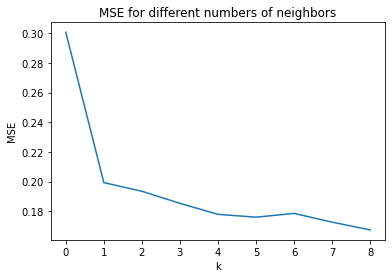

In [44]:
#As we increase our k value, our MSE stays the same for validation data
plt.plot(mses1)
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("MSE for different numbers of neighbors")

Text(0, 0.5, 'error')

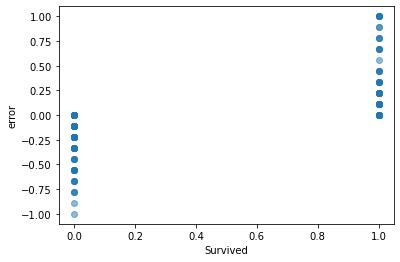

In [45]:
plt.scatter(Y_val, Y_val - iy_pred_scaled1, alpha = 0.5)
plt.xlabel('Survived')
plt.ylabel('error')

**Second Model. Logistic Regression**

In [46]:
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
#Observe p values and R square(34.19%)
logit_model2 = smf.logit("Survived ~ Pclass + Age + SibSp + Parch + Fare + Sex_male + Embarked_C + Embarked_Q + Embarked_S", data = titanic_new2).fit()
logit_model2.summary()

Optimization terminated successfully.
         Current function value: 0.444061
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Sat, 23 Apr 2022   Pseudo R-squ.:                  0.3419
Time:                        14:13:01   Log-Likelihood:                -316.17
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 3.392e-66
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9219   1.11e+07   3.54e-07      1.000   -2.17e+07    2.17e+07
Pclass        -1.1993      0.165     -7.285      0.000      -1.522      -0.877
Age           -0.0433      0.008     -5.266      0.000      -0.059      -0.027
SibSp         -0.3632      0.129     -2.815      0.005      -0.616      -0.110
Parch         -0.0603      0.124     -0.486      0.627      -0.303       0.183
Fare           0.0014      0.003      0.566      0.572      -0.004       0.006
Sex_male      -2.6385      0.222    -11.871      0.000      -3.074      -2.203
Embarked_C     1.7155   1.11e+07   1.55e-07      1.000   -2.17e+07    2.17e+07
Embarked_Q     0.8920   1.11e+07   8.05e-08      1.000   -2.17e+07    2.17e+07
Embarked_S     1.3143   1.11e+07   1.19e-07      1.000   -2.17e+07    2.17e+07
==============================================================================
"""

In [47]:
#Our R squared value slightly improved when dropping independent value 'Parch'
logit_model3 = smf.logit("Survived ~ Pclass + Age + SibSp + Fare + Sex_male + Embarked_C + Embarked_Q + Embarked_S", data = titanic_new2).fit()
logit_model3.summary()

Optimization terminated successfully.
         Current function value: 0.444229
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Sat, 23 Apr 2022   Pseudo R-squ.:                  0.3417
Time:                        14:13:04   Log-Likelihood:                -316.29
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 5.360e-67
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9235   8.39e+06   4.68e-07      1.000   -1.64e+07    1.64e+07
Pclass        -1.2102      0.163     -7.427      0.000      -1.530      -0.891
Age           -0.0433      0.008     -5.263      0.000      -0.059      -0.027
SibSp         -0.3796      0.125     -3.043      0.002      -0.624      -0.135
Fare           0.0012      0.002      0.474      0.635      -0.004       0.006
Sex_male      -2.6168      0.217    -12.040      0.000      -3.043      -2.191
Embarked_C     1.7142   8.39e+06   2.04e-07      1.000   -1.64e+07    1.64e+07
Embarked_Q     0.8987   8.39e+06   1.07e-07      1.000   -1.64e+07    1.64e+07
Embarked_S     1.3106   8.39e+06   1.56e-07      1.000   -1.64e+07    1.64e+07
==============================================================================
"""

In [48]:
#365 shows the value of individuals who actually did not survived
#59 shows the value of individuals who are predicted to have survived but in reality did not
#82 shows the value of individuals who are predicted to NOT have survived but in relatity did
#206 shows the value of individuals who actually survived.
confusion_matrix = logit_model2.pred_table()
confusion_matrix

array([[365.,  59.],
       [ 83., 205.]])

In [49]:
confusion_matrix[0][0]

365.0

In [50]:
confusion_matrix[0][1]

59.0

In [51]:
confusion_matrix[1][0]

83.0

In [52]:
confusion_matrix[1][1]

205.0

In [53]:
true_neg = confusion_matrix[0][0]
false_neg = confusion_matrix[1][0]
false_pos = confusion_matrix[0][1]
true_pos = confusion_matrix[1][1]

The *accuracy* of a classification model is proportion of data computed correctly:

In [54]:
accuracy = (true_pos + true_neg)/len(titanic_new2)
accuracy

0.800561797752809

*Sensitivity* or the *true positive rate* is the proportion of data belonging to the positive class that is classified correctly.

In [55]:
sensitivity = true_pos/(true_pos + false_neg)
sensitivity

0.7118055555555556

*Specificity* or the *true negative rate* is the proportion of data belonging to the negative class that is classified correctly. 

In [56]:
specificity = true_neg/(true_neg + false_pos)
specificity

0.8608490566037735

*Precision* is the proportion of positive predictions that are actual positives.

In [57]:
precision = true_pos/(true_pos + false_pos)
precision

0.7765151515151515